In [2]:
import pandas as pd

In [4]:
import chardet

with open('/content/customer_booking.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])


ISO-8859-1


In [11]:
# Read the dataset from a CSV file
data = pd.read_csv('/content/customer_booking.csv', encoding='ISO-8859-1')


In [12]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [15]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [16]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
data['sales_channel_encoded'] = label_encoder.fit_transform(data['sales_channel'])
data['trip_type_encoded'] = label_encoder.fit_transform(data['trip_type'])
data['flight_day_encoded'] = label_encoder.fit_transform(data['flight_day'])
data['booking_origin_encoded'] = label_encoder.fit_transform(data['booking_origin'])

# Create new feature: days_to_flight (purchase_lead - flight_duration)
data['days_to_flight'] = data['purchase_lead'] - data['flight_duration']

# Create new feature: flight_hour_category (Morning, Afternoon, Evening, Night)
data['flight_hour_category'] = pd.cut(data['flight_hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# Display the modified dataset
print(data.head())


   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0        

In [20]:
# Perform one-hot encoding for 'flight_hour_category'
X_encoded = pd.get_dummies(X, columns=['flight_hour_category'], drop_first=True)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.56      0.10      0.17      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.54      0.54     10000
weighted avg       0.82      0.86      0.81     10000



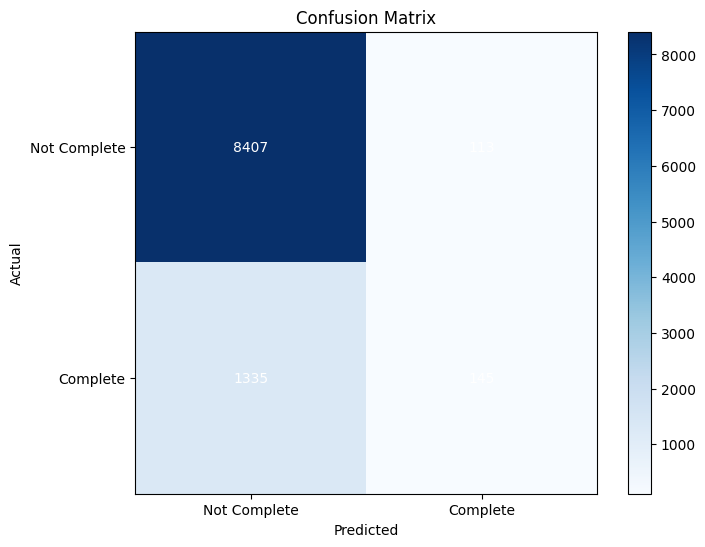

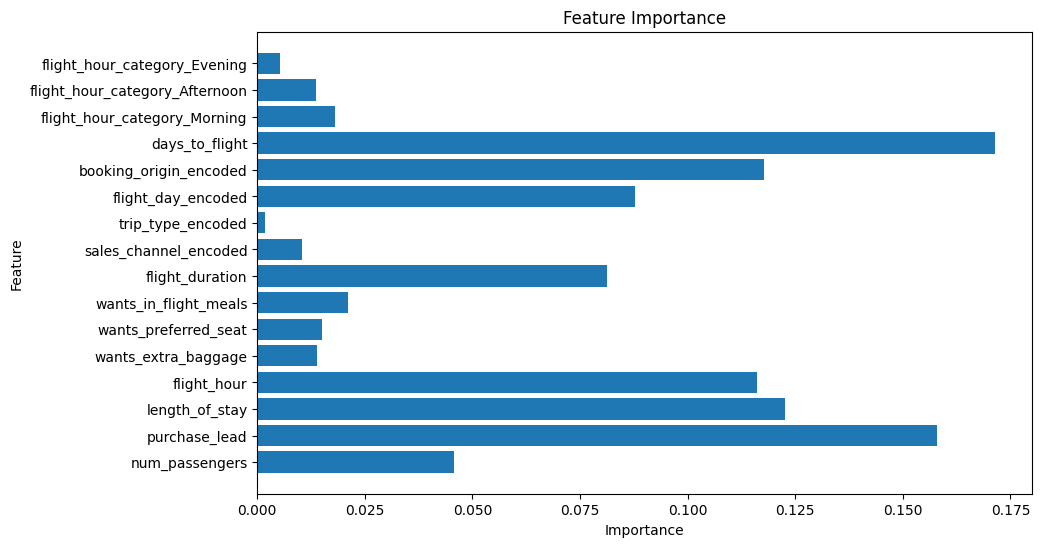

In [22]:
# Perform one-hot encoding for 'flight_hour_category'
X_encoded = pd.get_dummies(data.drop(['booking_complete', 'sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], axis=1),
                           columns=['flight_hour_category'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, data['booking_complete'], test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Not Complete', 'Complete'])
plt.yticks([0, 1], ['Not Complete', 'Complete'])
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')
plt.show()

# Feature Importance
feature_importance = rf_classifier.feature_importances_
features = X_encoded.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [23]:
# Train the Random Forest classifier with balanced class weights
rf_classifier_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_classifier_balanced.fit(X_train, y_train)

# Predict on the test set
y_pred_balanced = rf_classifier_balanced.predict(X_test)

# Evaluate the model with balanced class weights
print("Classification Report (Balanced Class Weights):")
print(classification_report(y_test, y_pred_balanced))


Classification Report (Balanced Class Weights):
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.56      0.09      0.15      1480

    accuracy                           0.85     10000
   macro avg       0.71      0.54      0.53     10000
weighted avg       0.82      0.85      0.81     10000



In [25]:
pip install xgboost


In [24]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Random Forest classifier with resampled data
rf_classifier_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_resampled.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_resampled = rf_classifier_resampled.predict(X_test)

# Evaluate the model with resampled data
print("Classification Report (SMOTE Oversampling):")
print(classification_report(y_test, y_pred_resampled))


Classification Report (SMOTE Oversampling):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      8520
           1       0.35      0.28      0.31      1480

    accuracy                           0.82     10000
   macro avg       0.62      0.60      0.60     10000
weighted avg       0.80      0.82      0.81     10000



In [26]:
from xgboost import XGBClassifier

# Train the XGBoost classifier with resampled data
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
print("Classification Report (XGBoost with SMOTE):")
print(classification_report(y_test, y_pred_xgb))


Classification Report (XGBoost with SMOTE):
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      8520
           1       0.34      0.29      0.31      1480

    accuracy                           0.81     10000
   macro avg       0.61      0.59      0.60     10000
weighted avg       0.80      0.81      0.80     10000

